# Speed Regression

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas
import sklearn.svm as svm
from sklearn.externals import joblib
import numpy as np
from speed_regression import training_data as td

In [5]:
nano_to_sec = 1e09

### Direct feature, step=50, window=200, use gyroscop and linear acceleration

<IPython.core.display.Javascript object>


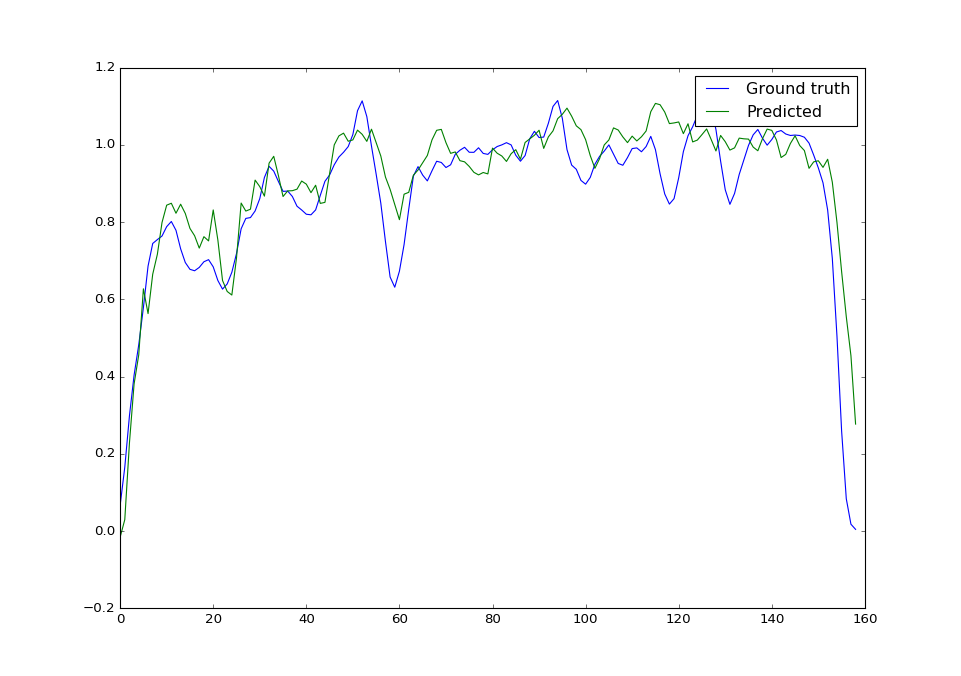

In [18]:
data_all = pandas.read_csv('../../data/20170126025407/processed/data.csv')
time_stamp = data_all['time'].values / nano_to_sec
options = td.TrainingDataOption(sample_step=50, window_size=200, feature='direct')
imu_columns = ['gyro_w', 'gyro_x', 'gyro_y', 'gyro_z', 'linacce_x', 'linacce_y', 'linacce_z']
test_set = td.get_training_data(data_all=data_all, imu_columns=imu_columns, option=options)

regressor = joblib.load('../../models/model_walk_direct_w200.svm')
predicted = regressor.predict(test_set[:, :-1])

plt.figure()
plt.plot(test_set[:, -1])
plt.plot(predicted)
plt.legend(['Ground truth', 'Predicted'])